In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import tensorflow
from tqdm import tqdm

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import  Activation, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [4]:
!unzip /content/sample_data/IntelImageClassification_Dataset.zip 
#!unzip /content/sample_data/PredictionData.zip

Streaming output truncated to the last 5000 lines.
  inflating: IntelImageClassification_Dataset/seg_test/seg_test/street/20127.jpg  
  inflating: __MACOSX/IntelImageClassification_Dataset/seg_test/seg_test/street/._20127.jpg  
  inflating: IntelImageClassification_Dataset/seg_test/seg_test/street/20084.jpg  
  inflating: __MACOSX/IntelImageClassification_Dataset/seg_test/seg_test/street/._20084.jpg  
  inflating: IntelImageClassification_Dataset/seg_test/seg_test/street/20090.jpg  
  inflating: __MACOSX/IntelImageClassification_Dataset/seg_test/seg_test/street/._20090.jpg  
  inflating: IntelImageClassification_Dataset/seg_test/seg_test/street/20286.jpg  
  inflating: __MACOSX/IntelImageClassification_Dataset/seg_test/seg_test/street/._20286.jpg  
  inflating: IntelImageClassification_Dataset/seg_test/seg_test/street/20079.jpg  
  inflating: __MACOSX/IntelImageClassification_Dataset/seg_test/seg_test/street/._20079.jpg  
  inflating: IntelImageClassification_Dataset/seg_test/seg_test/

#Creating a Sequential model

Will start with creating a sequential model composed of different layers- Conv2D, MaxPooling2D, Activtion, Flatten & Dense and check it's performance on our dataset

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense

# Set Up flow For Training & Validation data

In [8]:
# data flow parameters
training_data_dir = '/content/IntelImageClassification_Dataset/seg_train/seg_train'
validation_data_dir = '/content/IntelImageClassification_Dataset/seg_test/seg_test'
batch_size = 32
img_width = 128
img_height = 128
num_channels = 3
num_classes = 6

# image generators

using rescale = 1./255 means we'll force our pixel values which for each RGB layer range sing the dot between the division means we'll definitely return float values i.e., with decimal places rather than being returned an integer which will be problematic as then all of our pixels will then be forced to either be 0 or 1


In [9]:

training_generator = ImageDataGenerator(rescale = 1./255)
validation_generator = ImageDataGenerator(rescale = 1./255)

# image flows

training_set = training_generator.flow_from_directory(directory = training_data_dir,
                                                      target_size = (img_width, img_height),
                                                      batch_size = batch_size,
                                                      class_mode = 'categorical')
validation_set = validation_generator.flow_from_directory(directory = validation_data_dir,
                                                      target_size = (img_width, img_height),
                                                      batch_size = batch_size,
                                                      class_mode = 'categorical')

Found 2160 images belonging to 6 classes.
Found 208 images belonging to 6 classes.


# Network Architecture

In [56]:
# network architecture
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', input_shape = (img_width, img_height, num_channels)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile network

In [57]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# view network architecture

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 activation_8 (Activation)   (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 activation_9 (Activation)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                  

# Train Our Network!

In [58]:
# training parameters
num_epochs = 15
model_filename = 'models/imgclf_cnn_v01.h5'


# callbacks
save_best_model = ModelCheckpoint(filepath = model_filename, 
                                  monitor = 'val_accuracy',
                                  mode = 'max',
                                  verbose = 1,
                                  save_best_only= True)

# train the network

history = model.fit(x = training_set,
                    validation_data= validation_set,
                    batch_size = batch_size,
                    epochs = num_epochs,
                    callbacks = [save_best_model])

Epoch 1/15
68/68 [==============================] - ETA: 0s - loss: 1.3095 - accuracy: 0.4704
Epoch 1: val_accuracy improved from -inf to 0.54808, saving model to models/imgclf_cnn_v01.h5
68/68 [==============================] - 51s 718ms/step - loss: 1.3095 - accuracy: 0.4704 - val_loss: 1.1320 - val_accuracy: 0.5481
Epoch 2/15
68/68 [==============================] - ETA: 0s - loss: 0.9934 - accuracy: 0.6102
Epoch 2: val_accuracy improved from 0.54808 to 0.58173, saving model to models/imgclf_cnn_v01.h5
68/68 [==============================] - 50s 732ms/step - loss: 0.9934 - accuracy: 0.6102 - val_loss: 1.0346 - val_accuracy: 0.5817
Epoch 3/15
68/68 [==============================] - ETA: 0s - loss: 0.8984 - accuracy: 0.6542
Epoch 3: val_accuracy improved from 0.58173 to 0.59615, saving model to models/imgclf_cnn_v01.h5
68/68 [==============================] - 48s 708ms/step - loss: 0.8984 - accuracy: 0.6542 - val_loss: 0.9951 - val_accuracy: 0.5962
Epoch 4/15
68/68 [================

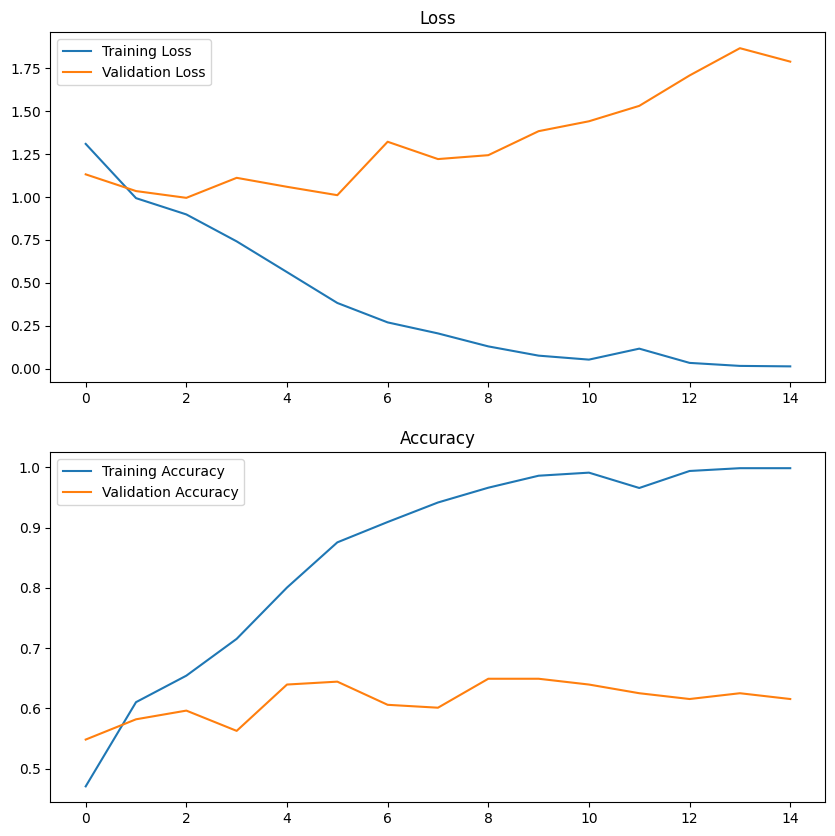

In [59]:
import matplotlib.pyplot as plt

# plot validation results
fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax[0].set_title('Loss')
ax[0].plot(history.epoch, history.history["loss"], label="Training Loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation Loss")
ax[1].set_title('Accuracy')
ax[1].plot(history.epoch, history.history["accuracy"], label="Training Accuracy")
ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy")
ax[0].legend()
ax[1].legend()
plt.show()

As evident our model is overfitting. Let's add dropout layer and reducing the no. of epochs for trainingour model.

In [13]:
# network architecture with drop out layer added
model_1 = Sequential()

model_1.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', input_shape = (img_width, img_height, num_channels)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D())

model_1.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D())

model_1.add(Flatten())

model_1.add(Dense(32))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))

model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

In [14]:
# compile network

model_1.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [15]:
# view network architecture

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 activation_4 (Activation)   (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                  

# Train Our new Network with dropout layer

In [16]:
# training parameters
num_epochs = 10
model_filename = 'contents/models/imgclf_cnn_v02.h5'


# callbacks
save_best_model = ModelCheckpoint(filepath = model_filename, 
                                  monitor = 'val_accuracy',
                                  mode = 'max',
                                  verbose = 1,
                                  save_best_only= True)

# train the network

history = model_1.fit(x = training_set,
                    validation_data= validation_set,
                    batch_size = batch_size,
                    epochs = num_epochs,
                    callbacks = [save_best_model])

Epoch 1/10
68/68 [==============================] - ETA: 0s - loss: 1.6395 - accuracy: 0.3162
Epoch 1: val_accuracy improved from -inf to 0.42788, saving model to contents/models/imgclf_cnn_v02.h5
68/68 [==============================] - 52s 753ms/step - loss: 1.6395 - accuracy: 0.3162 - val_loss: 1.2957 - val_accuracy: 0.4279
Epoch 2/10
68/68 [==============================] - ETA: 0s - loss: 1.3498 - accuracy: 0.4343
Epoch 2: val_accuracy improved from 0.42788 to 0.49038, saving model to contents/models/imgclf_cnn_v02.h5
68/68 [==============================] - 48s 709ms/step - loss: 1.3498 - accuracy: 0.4343 - val_loss: 1.1835 - val_accuracy: 0.4904
Epoch 3/10
68/68 [==============================] - ETA: 0s - loss: 1.2761 - accuracy: 0.4551
Epoch 3: val_accuracy improved from 0.49038 to 0.57212, saving model to contents/models/imgclf_cnn_v02.h5
68/68 [==============================] - 50s 738ms/step - loss: 1.2761 - accuracy: 0.4551 - val_loss: 1.1247 - val_accuracy: 0.5721
Epoch 4

# Visualise Training & Validation Performance

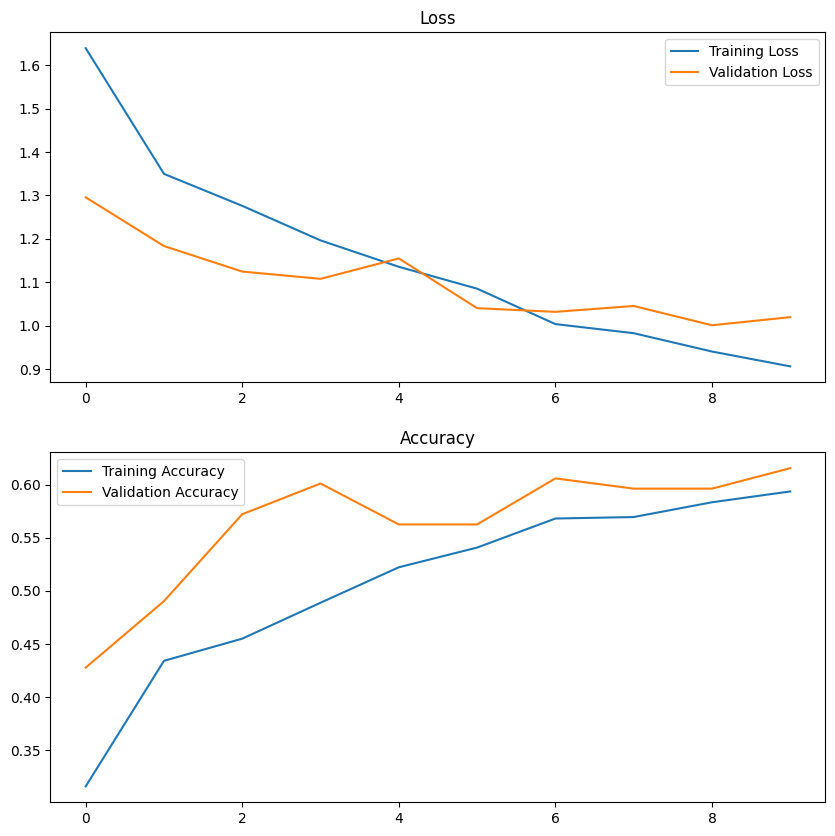

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# plot validation results
fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax[0].set_title('Loss')
ax[0].plot(history.epoch, history.history["loss"], label="Training Loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation Loss")
ax[1].set_title('Accuracy')
ax[1].plot(history.epoch, history.history["accuracy"], label="Training Accuracy")
ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy")
#ax[0].set_xlim(1, 11)
#ax[1].set_xticklabels(np.arange(1, num_epochs+1))
ax[0].legend()
ax[1].legend()
plt.show()

In [54]:
import pandas as pd
history_df = pd.DataFrame(history.epoch)

In [18]:
# get best epoch performance for validation accuracy
max(history.history['val_accuracy'])

0.6153846383094788

Comparing both the models, the one without dropout layer was overfitting and at 15 epochs almost reached an accuracy of 100% at training set but on validation set it didn't cross 62%. However in our second model, with the dropout we have dealt with over-fitting in our previous model and are now seeing the generalisation that we wanted.

### Let's make prediction with our second model and check the performance


In [60]:
# import required packages
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd
import numpy as np
from os import listdir


In [61]:
# parameters for prediction
model_filename = 'contents/models/imgclf_cnn_v02.h5'
img_width = 128
img_height = 128
labels_list = ['buildings','forest','glacier','mountain','sea','street']


# load model
model = load_model(model_filename)


In [62]:
# image pre-processing function
def preprocess_image(filepath):
    image = load_img(filepath, target_size=(img_width, img_height))
    image = img_to_array(image)
    image = np.expand_dims(image, axis = 0)
    image = image * (1./255)
    
    return image


# image prediction function
def make_prediction(image):
    class_probs = model.predict(image)
    pred_class = np.argmax(class_probs)
    predicted_label = labels_list[pred_class]
    predicted_prob = class_probs[0][pred_class]
    
    return predicted_label, predicted_prob

In [66]:
import io
import os
import PIL.Image

# loop through test data
source_dir = '/content/PredictionData/seg_pred/seg_pred'
folder_names = ['buildings','forest','glacier','mountain','sea','street']
actual_labels =[]
predicted_labels = []
predicted_probabilities = []
filenames = []

for folder in folder_names:
    
    images = os.listdir(os.path.join(source_dir, folder))
    
    for image in images:
        image_path = os.path.join(os.path.join(source_dir, folder),image)
        print(image_path)
        if os.path.isfile(image_path):
          processed_image = preprocess_image(image_path)
          predicted_label, predicted_probability = make_prediction(processed_image)
          actual_labels.append(folder)
          predicted_labels.append(predicted_label)
          predicted_probabilities.append(predicted_probability)
          filenames.append(image)

        else:
          print('specified path is a folder')  

/content/PredictionData/seg_pred/seg_pred/buildings/24103.jpg
1/1 [==============================] - 0s 29ms/step
/content/PredictionData/seg_pred/seg_pred/buildings/24203.jpg
1/1 [==============================] - 0s 27ms/step
/content/PredictionData/seg_pred/seg_pred/buildings/24023.jpg
1/1 [==============================] - 0s 28ms/step
/content/PredictionData/seg_pred/seg_pred/buildings/24063.jpg
1/1 [==============================] - 0s 35ms/step
/content/PredictionData/seg_pred/seg_pred/buildings/24197.jpg
1/1 [==============================] - 0s 26ms/step
/content/PredictionData/seg_pred/seg_pred/buildings/24119.jpg
1/1 [==============================] - 0s 28ms/step
/content/PredictionData/seg_pred/seg_pred/buildings/24053.jpg
1/1 [==============================] - 0s 26ms/step
/content/PredictionData/seg_pred/seg_pred/buildings/24322.jpg
1/1 [==============================] - 0s 29ms/step
/content/PredictionData/seg_pred/seg_pred/buildings/24083.jpg
1/1 [=====================

In [67]:
# create dataframe to analyse
predictions_model_1_df = pd.DataFrame({"actual_label" : actual_labels,
                               "predicted_label" : predicted_labels,
                               "predicted_probability" : predicted_probabilities,
                               "filename" : filenames})
predictions_model_1_df["correct_prediction"] = np.where(predictions_model_1_df["predicted_label"] == predictions_model_1_df["actual_label"],1,0)


In [68]:
# overall test set accuracy
test_set_accuracy = predictions_model_1_df['correct_prediction'].sum() / len(predictions_model_1_df)
print(f'Accuracy: {test_set_accuracy}')

Accuracy: 0.6244541484716157


In [69]:
# confusion matrix(raw numbers)
confusion_matrix = pd.crosstab(predictions_model_1_df["predicted_label"], predictions_model_1_df["actual_label"])
print(confusion_matrix)

actual_label     buildings  forest  glacier  mountain  sea  street
predicted_label                                                   
buildings               30       3        1         3    0       8
forest                   0      28        0         0    0       1
glacier                  2       1       24         4   13       1
mountain                 0       1        6        22   14       1
sea                      1       0        5         9   12       0
street                   5       5        2         0    0      27


Sequential model achieved an accuracy of 62% on our prediction dataset. Let's try _transfer learning_ approach using pre-trained _VGG16_ network. 

#Transfer Learning using VGG16 ImageNet 
Set Up flow For Training & Validation data

> VGG16 was trained on imageNet images of dimensions 224*224 pixels

In [8]:
training_data_dir = '/content/IntelImageClassification_Dataset/seg_train/seg_train'
validation_data_dir = '/content/IntelImageClassification_Dataset/seg_test/seg_test'
batch_size = 32
img_width = 224
img_height = 224
num_channels = 3
num_classes = 6

In [9]:
training_generator = ImageDataGenerator(preprocessing_function = preprocess_input,
                                        rotation_range = 20,
                                        width_shift_range = 0.2,
                                        height_shift_range = 0.2,
                                        zoom_range = 0.1,
                                        horizontal_flip = True,
                                        brightness_range=(0.5,1.5),
                                        fill_mode = 'nearest')

validation_generator = ImageDataGenerator(preprocessing_function = preprocess_input)

In [10]:
training_data = training_generator.flow_from_directory(directory = training_data_dir,
                                                      target_size = (img_width, img_height),
                                                      batch_size = batch_size,
                                                      class_mode = 'categorical')
validation_data = validation_generator.flow_from_directory(directory = validation_data_dir,
                                                      target_size = (img_width, img_height),
                                                      batch_size = batch_size,
                                                      class_mode = 'categorical')

Found 2160 images belonging to 6 classes.
Found 208 images belonging to 6 classes.


#Building our Network Architecture

We'll use our VGG16 model and as we only want initial layers of the VGG16 and not the dense layer or the output layer
we'll set include_top attribute to False
and we'll also freeze the network parameters for the entire network that we'll download, so that during training process they are not updated  and only updated parameters are those in our dense and output layer, 
durig backpropagation. 

This freezing will ensure we can use all the amazing features that this huge network of VGG16 has learnt from the ImageNet dataset of over 1000 classes

In [ ]:
vgg = VGG16(input_shape = (img_width, img_height, num_channels), include_top = False)

#freeze all layers
for layer in vgg.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.summary()
#Before freezing the layers vgg.summary displayed Trainable params: 14,714,688 and 
#after freezing--> Trainable params: 0


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
flatten = Flatten()(vgg.output)

dense1 = Dense(128, activation= 'relu')(flatten)
dense2 = Dense(128, activation= 'relu')(dense1)

output = Dense(num_classes, activation = 'softmax')(dense2)

model = Model(inputs = vgg.inputs, outputs = output )

# compile network

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# view network architecture
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#Train our Network

In [ ]:
# training parameters
num_epochs = 10
model_filename = 'contents/imgclf_cnn_vgg.h5'


# callbacks
save_best_model = ModelCheckpoint(filepath = model_filename, 
                                  monitor = 'val_accuracy',
                                  mode = 'max',
                                  verbose = 1,
                                  save_best_only= True)

# train the network

history = model.fit(x = training_data,
                    validation_data= validation_data,
                    batch_size = batch_size,
                    epochs = num_epochs,
                    callbacks = [save_best_model])


Epoch 1/10
68/68 [==============================] - ETA: 0s - loss: 2.5009 - accuracy: 0.7352 
Epoch 1: val_accuracy improved from -inf to 0.74519, saving model to contents/imgclf_cnn_vgg.h5
68/68 [==============================] - 1494s 22s/step - loss: 2.5009 - accuracy: 0.7352 - val_loss: 1.9070 - val_accuracy: 0.7452
Epoch 2/10
68/68 [==============================] - ETA: 0s - loss: 0.9523 - accuracy: 0.8093 
Epoch 2: val_accuracy improved from 0.74519 to 0.86058, saving model to contents/imgclf_cnn_vgg.h5
68/68 [==============================] - 1496s 22s/step - loss: 0.9523 - accuracy: 0.8093 - val_loss: 1.0383 - val_accuracy: 0.8606
Epoch 3/10
68/68 [==============================] - ETA: 0s - loss: 0.6512 - accuracy: 0.8366 
Epoch 3: val_accuracy did not improve from 0.86058
68/68 [==============================] - 1498s 22s/step - loss: 0.6512 - accuracy: 0.8366 - val_loss: 0.7397 - val_accuracy: 0.8606
Epoch 4/10
68/68 [==============================] - ETA: 0s - loss: 0.590

In [ ]:

history_df = pd.DataFrame(history.history)
print(history_df)

       loss  accuracy  val_loss  val_accuracy
0  2.500923  0.735185  1.906991      0.745192
1  0.952255  0.809259  1.038318      0.860577
2  0.651210  0.836574  0.739737      0.860577
3  0.590789  0.852315  0.802603      0.875000
4  0.534396  0.842593  0.808460      0.884615
5  0.469943  0.872685  0.551520      0.870192
6  0.364099  0.878704  0.409335      0.894231
7  0.348752  0.896759  0.684552      0.865385
8  0.375283  0.896296  0.623163      0.860577
9  0.358432  0.886574  0.578140      0.865385


## Visualise Training & Validation Performance

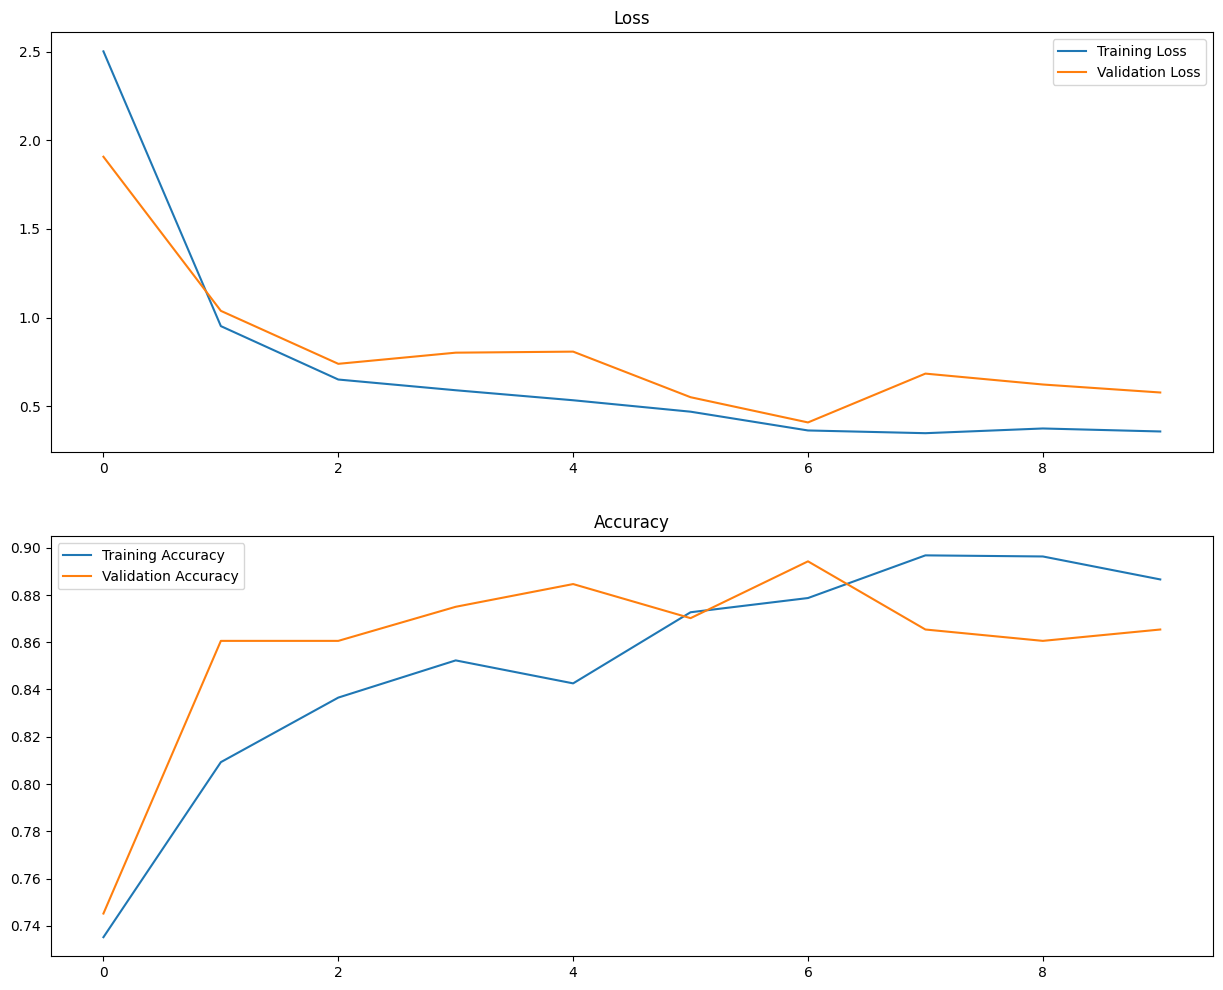

In [89]:
import matplotlib.pyplot as plt

# plot validation results
fig, ax = plt.subplots(2, 1, figsize=(15,12))
ax[0].set_title('Loss')
ax[0].plot(history.epoch, history.history["loss"], label="Training Loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation Loss")
ax[1].set_title('Accuracy')
ax[1].plot(history.epoch, history.history["accuracy"], label="Training Accuracy")
ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy")
ax[0].legend()
ax[1].legend()
plt.show()


After training our model for 10 epochs it achieved an accuracy of 89% on our validation set and 87% on our training set. From the above plots we can see that our model is neither overfit nor underfit.

In [ ]:
# get best epoch performance for validation accuracy
max(history.history['val_accuracy'])

0.8942307829856873

## Make Predictions On New Data (Test Set)

In [ ]:
# import required packages
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd
import numpy as np
from os import listdir


In [ ]:
# parameters for prediction
model_filename = 'contents/imgclf_cnn_vgg.h5'
img_width = 224
img_height = 224
labels_list = ['buildings','forest','glacier','mountain','sea','street']

In [ ]:
# load model
model = load_model(model_filename)


Defining functions for Image Pre-processing and image prediction

In [ ]:
# image pre-processing function
def preprocess_image(filepath):
    image = load_img(filepath, target_size=(img_width, img_height))
    image = img_to_array(image)
    image = np.expand_dims(image, axis = 0)
    image = preprocess_input(image)
    
    return image


# image prediction function
def make_prediction(image):
    class_probs = model.predict(image)
    pred_class = np.argmax(class_probs)
    predicted_label = labels_list[pred_class]
    predicted_prob = class_probs[0][pred_class]
    
    return predicted_label, predicted_prob


In [ ]:
!unzip /content/sample_data/IntelImageClassification_test.zip

In [ ]:
import io
import os
import PIL.Image

# loop through test data
source_dir = '/content/PredictionData/seg_pred/seg_pred'
folder_names = ['buildings','forest','glacier','mountain','sea','street']
actual_labels =[]
predicted_labels = []
predicted_probabilities = []
filenames = []

for folder in folder_names:
    
    images = os.listdir(os.path.join(source_dir, folder))
    
    for image in images:
        image_path = os.path.join(os.path.join(source_dir, folder),image)
        print(image_path)
        if os.path.isfile(image_path):
          processed_image = preprocess_image(image_path)
          predicted_label, predicted_probability = make_prediction(processed_image)
          actual_labels.append(folder)
          predicted_labels.append(predicted_label)
          predicted_probabilities.append(predicted_probability)
          filenames.append(image)

        else:
          print('specified path is a folder')  

/content/PredictionData/seg_pred/seg_pred/buildings/24053.jpg
1/1 [==============================] - 1s 582ms/step
/content/PredictionData/seg_pred/seg_pred/buildings/24160.jpg
1/1 [==============================] - 1s 576ms/step
/content/PredictionData/seg_pred/seg_pred/buildings/24119.jpg
1/1 [==============================] - 1s 573ms/step
/content/PredictionData/seg_pred/seg_pred/buildings/24131.jpg
1/1 [==============================] - 1s 560ms/step
/content/PredictionData/seg_pred/seg_pred/buildings/24203.jpg
1/1 [==============================] - 1s 568ms/step
/content/PredictionData/seg_pred/seg_pred/buildings/24275.jpg
1/1 [==============================] - 1s 584ms/step
/content/PredictionData/seg_pred/seg_pred/buildings/24179.jpg
1/1 [==============================] - 1s 569ms/step
/content/PredictionData/seg_pred/seg_pred/buildings/24153.jpg
1/1 [==============================] - 1s 558ms/step
/content/PredictionData/seg_pred/seg_pred/buildings/24017.jpg
1/1 [=============

In [65]:
#removing the files that are not images and causing problem while predicting
! rm /content/PredictionData/seg_pred/seg_pred/buildings/.DS_Store
! rm /content/PredictionData/seg_pred/seg_pred/forest/.DS_Store
! rm /content/PredictionData/seg_pred/seg_pred/glacier/.DS_Store
! rm /content/PredictionData/seg_pred/seg_pred/mountain/.DS_Store
! rm /content/PredictionData/seg_pred/seg_pred/sea/.DS_Store
! rm /content/PredictionData/seg_pred/seg_pred/street/.DS_Store

In [39]:
# create dataframe to analyse
predictions_df = pd.DataFrame({"actual_label" : actual_labels,
                               "predicted_label" : predicted_labels,
                               "predicted_probability" : predicted_probabilities,
                               "filename" : filenames})
predictions_df["correct_prediction"] = np.where(predictions_df["predicted_label"] == predictions_df["actual_label"],1,0)



In [44]:
# overall test set accuracy
test_set_accuracy = predictions_df['correct_prediction'].sum() / len(predictions_df)
print(f'Accuracy: {test_set_accuracy}')


Accuracy: 0.9039301310043668


In [45]:
# confusion matrix(raw numbers)
confusion_matrix = pd.crosstab(predictions_df["predicted_label"], predictions_df["actual_label"])
print(confusion_matrix)

actual_label     buildings  forest  glacier  mountain  sea  street
predicted_label                                                   
buildings               33       0        0         0    0       2
forest                   0      38        0         1    0       0
glacier                  0       0       29         3    0       0
mountain                 0       0        7        33    0       0
sea                      1       0        2         1   39       1
street                   4       0        0         0    0      35


In [43]:
# confusion matrix(percentage)
confusion_matrix = pd.crosstab(predictions_df["predicted_label"], predictions_df["actual_label"], normalize= 'columns')
print(confusion_matrix)

actual_label     buildings  forest   glacier  mountain  sea    street
predicted_label                                                      
buildings         0.868421     0.0  0.000000  0.000000  0.0  0.052632
forest            0.000000     1.0  0.000000  0.026316  0.0  0.000000
glacier           0.000000     0.0  0.763158  0.078947  0.0  0.000000
mountain          0.000000     0.0  0.184211  0.868421  0.0  0.000000
sea               0.026316     0.0  0.052632  0.026316  1.0  0.026316
street            0.105263     0.0  0.000000  0.000000  0.0  0.921053


Model achieved an accuracy of 90% on prediction test set, concluding that using transfer learning approach and VGG16 resulted in extremely good performance metric compared to our sequential model. However, it has trouble with glacier and mountain. Well, it can be understandable as as there are glaciers(& confusing them with sea) look like mountain covered in snow. It has also trouble with building, street.But, it can detects forest and sea very accurately!

#Checking the mislabeled images

This will give us a clear idea as to why the model misclassified them.

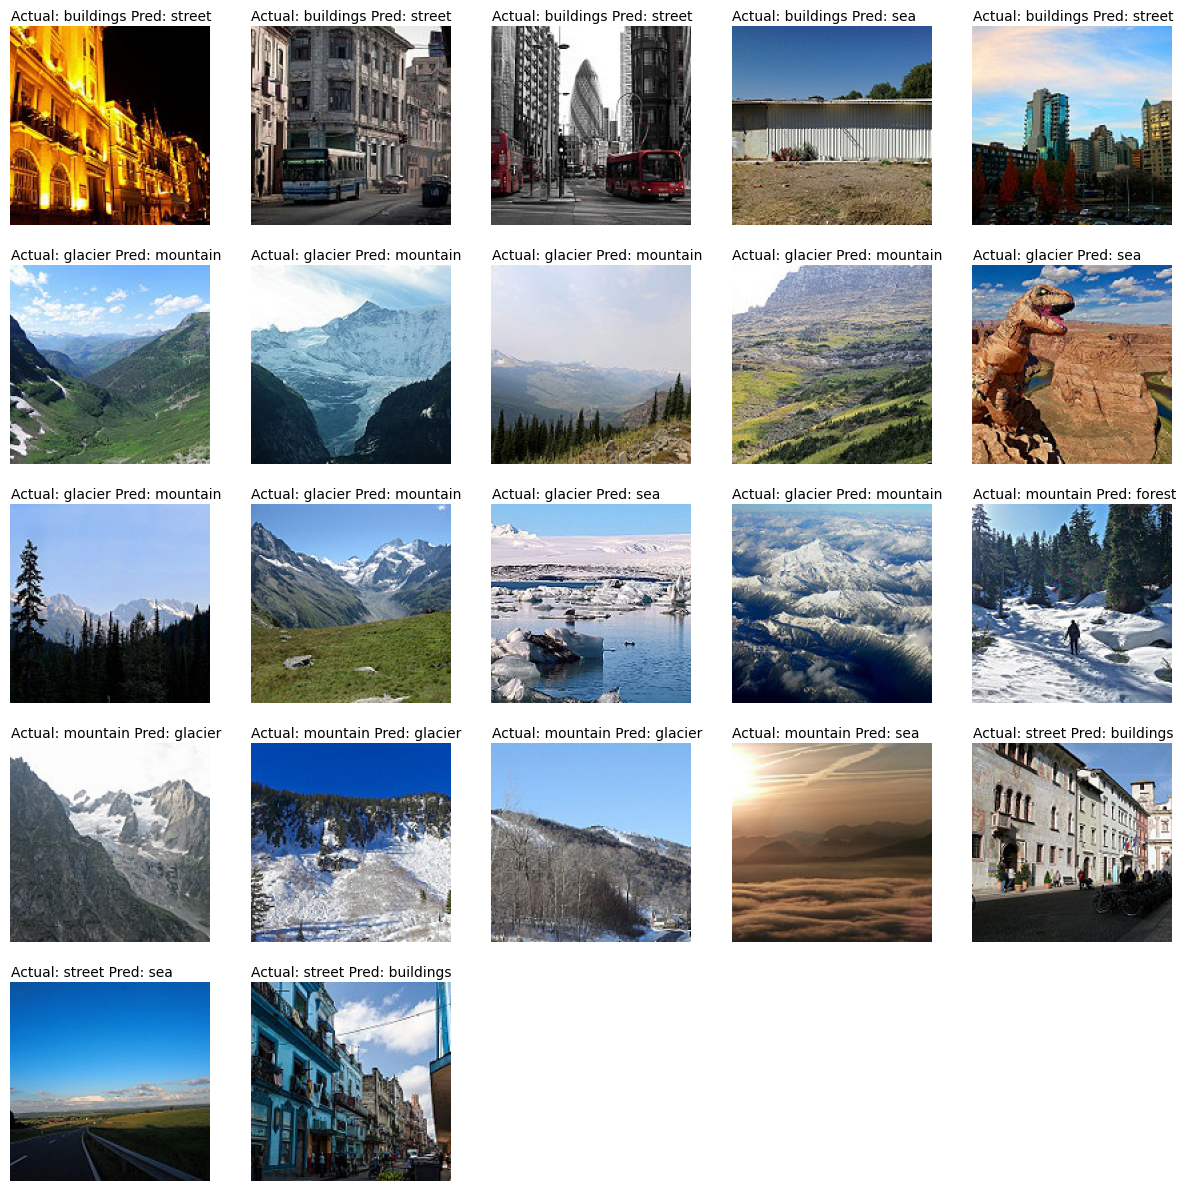

In [105]:
from IPython.core.display import display_jpeg
import numpy as np

mislabeled_indices = np.where(predictions_df["predicted_label"] != predictions_df["actual_label"])
image =[]
actual_label =[]
predicted_label =[]

for idx in mislabeled_indices[0]:
  folder = "".join(predictions_df["actual_label"].iloc[idx])
  filename = "".join(predictions_df["filename"].iloc[idx])
  
  image.append(PIL.Image.open(source_dir +'/' + folder + '/' + filename))
  predicted_label.append(predictions_df["predicted_label"].iloc[idx])
  actual_label.append(predictions_df["actual_label"].iloc[idx])
  #image.show()
  #print("Actual_label:"+ actual_label, "Predicted_label :" + predicted_label)
  
plt.figure(figsize=(15,15)) # specifying the overall grid size

for i in range(len(image)):
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(image[i])
    plt.axis('off')
    plt.text(0, -5, ("Actual: "+actual_label[i]+" Pred: " + predicted_label[i]))

plt.show()  
